IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd 

LOAD THE TWO CLASS TESTING MODEL USING PANDAS

In [2]:
# Loading test model
dataset1_test = pd.read_csv("ee559_dataset/dataset1_test.csv")
dataset2_test = pd.read_csv("ee559_dataset/dataset2_test.csv")
dataset3_test = pd.read_csv("ee559_dataset/dataset3_test.csv")

testing_datasets = [dataset1_test, dataset2_test, dataset3_test]

LOAD THE TWO CLASS TRAINING MODEL USING PANDAS

In [3]:
# Loading train model

dataset1_train = pd.read_csv("ee559_dataset/dataset1_train.csv")
dataset2_train = pd.read_csv("ee559_dataset/dataset2_train.csv")
dataset3_train = pd.read_csv("ee559_dataset/dataset3_train.csv")

training_datasets = [dataset1_train, dataset2_train, dataset3_train]

In [4]:
dataset1_train

,X-axis,Y-axis,Class
0,-2.551392,-0.445095,2.0
1,2.509011,-1.430325,1.0
2,0.754025,0.862413,1.0
3,-0.534698,-1.150850,2.0
4,0.489164,2.747746,1.0
...,...,...,...
95,-2.003086,0.634789,2.0
96,-1.584950,-1.673765,2.0
97,0.842365,1.756364,1.0
98,-0.891978,3.958774,1.0


IMPORT THE PLOTDECBOUNDRY FILE PROVIDED BY THE PROFESSOR

In [5]:
from plotDecBoundaries import plotDecBoundaries

PART A

Learning (training) and classification. Use unnormalized data as supplied in the datasets. For each dataset (1, 2, and 3), do the following. Compute the class means on the training data.
(i) Plot the training data (using different colors or symbols for the different classes), the class means, the decision boundary, and decision regions. Classify all data points in the training set and in the test set, using the class means computed above.
(ii) Report the classification error rate on the training set, and separately on the test set. Classification error rate = (Number of points misclassified) / (total number of points tried), expressed as percentage. 

EXTRACT FEATURES OF DATA AND CLASS LABELES AS ARRAYS

In [6]:
def get_features(df):
    # Assuming the last column is the class/label and the rest are features
    labels = df.iloc[:, -1].values
    features = df.iloc[:, :-1].values
    return features, labels


CALCULATING MEAN FOR THE DATSETS BY DIVIDNG SUM BY COUNTS

In [7]:
import numpy as np

def calc_mean(features, labels):
    # Identify unique labels
    unique_labels = np.unique(labels)
    num_features = features.shape[1]
    mean_arr = np.zeros((len(unique_labels), num_features))

    for i, label in enumerate(unique_labels):
        # Filter features by the current label
        filtered_features = features[labels == label]

        # Calculate mean for each feature dimension
        for j in range(num_features):
            mean_arr[i, j] = np.mean(filtered_features[:, j])

    return mean_arr


PRINTING MEAN FOR dataset1_train

In [8]:
x, y = get_features(dataset1_train) 
#print mean 
print(calc_mean(x, y))

[[ 0.95241532  1.10692304]
 [-0.99013111 -0.94791734]]


In [9]:
dataset1_train.columns

Index(['X-axis', 'Y-axis', 'Class'], dtype='object')

In [10]:
dataset2_train

,X-axis,Y-axis,Class
0,0.523264,-0.824963,2.0
1,-3.261101,-1.272444,2.0
2,-0.086203,0.553352,1.0
3,-0.744623,-1.076374,2.0
4,0.098614,0.442708,1.0
...,...,...,...
95,-9.297768,-1.245431,2.0
96,-9.585490,0.920370,1.0
97,-4.531826,-0.617339,2.0
98,0.816703,1.534297,1.0


SAMPLE PLOT BOUNDRIES AND DECISION REGION FOR dataset1_train

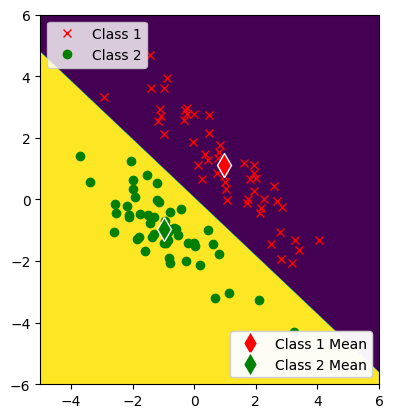

In [11]:
#sample plot
plotDecBoundaries(x,y, calc_mean(x, y))

CALCULATE THE CLASSIFICATION ERROR TO DIFFERNETIATE THE CLASSES WITH EUCLIDEAN DISTANCE

In [12]:
import numpy as np

def classification_error(features, labels, mean_arr):
    num_samples = features.shape[0]
    num_means = mean_arr.shape[0]
    distances = np.zeros((num_samples, num_means))

    # Calculate the squared Euclidean distance for each feature to each mean vector
    for i in range(num_samples):
        for j in range(num_means):
            diff = features[i] - mean_arr[j]
            distances[i, j] = np.sum(diff ** 2)

    # Predict labels based on the nearest mean vector
    predicted_labels = np.argmin(distances, axis=1) + 1  
    incorrect_classifications = np.sum(predicted_labels != labels)

    return (incorrect_classifications / len(features)) * 100


PLOT THE TRAINING DATASET BY USING PLOTDECBOUNDRIES.PY AND CLASSIFICATION OF POINTS BASED ON CLASSIFICAION ERROR FUNCTION

Decision Bopundry for Training Dataset


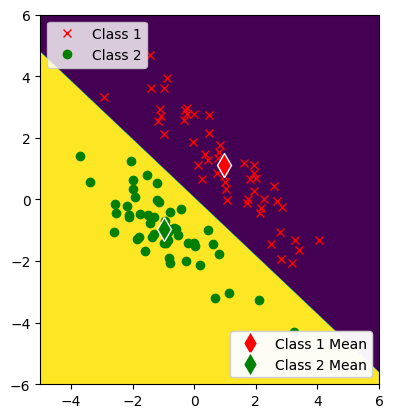

Classification Error: 0.0%


Decision Bopundry for Training Dataset


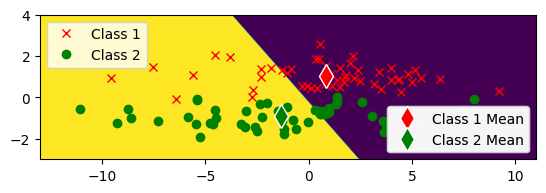

Classification Error: 30.0%


Decision Bopundry for Training Dataset


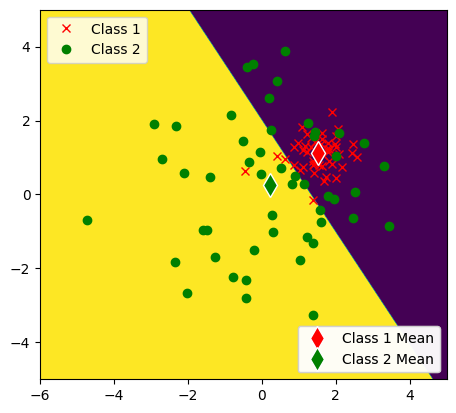

Classification Error: 23.0%




In [13]:
list_means = [] 

for dataset in training_datasets: 
  # get features and label 
  features, labels = get_features(dataset) 
  # Calculate the mean
  mean_arr = calc_mean(features, labels) 
  list_means.append(mean_arr) 

  # Plot Decision Boundaries
  print("Decision Bopundry for Training Dataset")
  plotDecBoundaries(features,labels,mean_arr)
  percentage = classification_error(features,labels,mean_arr)
  print(f"Classification Error: {percentage}%\n\n")

CLASSIFICATION OF TESTING DATASET POINTS BASED ON CLASSIFICAION ERROR FUNCTION

In [14]:
list_means

[array([[ 0.95241532,  1.10692304],
        [-0.99013111, -0.94791734]]),
 array([[ 0.81228073,  1.03065531],
        [-1.36063677, -0.88705093]]),
 array([[1.52139814, 1.11067296],
        [0.21877464, 0.25172042]])]

In [15]:
# Initialize empty lists to store features, labels, and classification error percentages
features = []
labels = []
percentage = []

for index in range(len(testing_datasets)):
    # Extract features and labels from the current testing dataset
    f, l = get_features(testing_datasets[index])

    # Append the extracted features and labels to their respective lists
    features.append(f)
    labels.append(l)

    # Calculate the classification error for the current dataset by comparing the predicted labels based on the mean vectors
    percentage.append(classification_error(features[index], labels[index], list_means[index]))

    print(f"Testing Dataset {index + 1} | Classification Error: {percentage[index]}%")


Testing Dataset 1 | Classification Error: 0.0%
Testing Dataset 2 | Classification Error: 24.0%
Testing Dataset 3 | Classification Error: 21.0%


In [16]:
mean_arr

array([[1.52139814, 1.11067296],
       [0.21877464, 0.25172042]])

PART B

Unnormalized Dataset:

Testing Dataset 1 | Classification Error: 0.0%
Testing Dataset 2 | Classification Error: 24.0%
Testing Dataset 3 | Classification Error: 21.0%

Training Dataset 1 | Classification Error: 0.0%
Training Dataset 2 | Classification Error: 30.0%
Training Dataset 13| Classification Error: 23.0%

Dataset_1: The Classification of both training and testing datsets leads to 0% error rate. This leads to the model perfectly classifying points to the respective classes.

Dataset_2: The Classification error of both traing and testing dataset gives slightly error, but compared to training datset the error is bit higher on the training dataset.
           This suggests the mean of the features is not calculated perfectly so that the decison boundry classifies each and every point correctly.There are overlapping classes which leads to classification errors.

Dataset_3: The Classification error of both traing and testing dataset gives slightly error, but compared to training datset the error is bit higher on the training dataset.
           This suggests the mean of the features is not calculated perfectly so that the decison boundry classifies each and every point correctly.There are overlapping classes which leads to classification errors.

PART C

Preprocessing: normalization. Standardize the data (so that each feature, across both classes combined, has sample mean = 0 and sample variance = 1). For each dataset, compute the
normalizing parameters from the training data, and then use those parameter values to standardize the training data and test data. The result is the (standardized) data you will use for
this part. Repeat part (a), except on the standardized data. 

NORMALIZE THE DATASET WITH MEAN = 0 ; VARIANCE = 1

In [17]:
def normalize(features):
  #find Mean and Standard Deviation
  means = np.mean(features, axis = 0)
  stds = np.std(features, axis = 0)
  return (features - means) / stds

PLOT THE TESTING DATASET BY USING PLOTDECBOUNDRIES.PY AND CLASSIFICATION OF POINTS BASED ON CLASSIFICAION ERROR FUNCTION

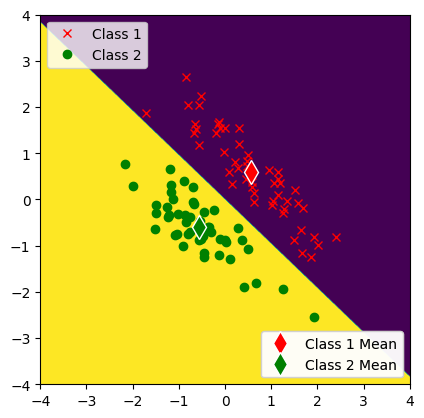

Classification Error: 0.0%




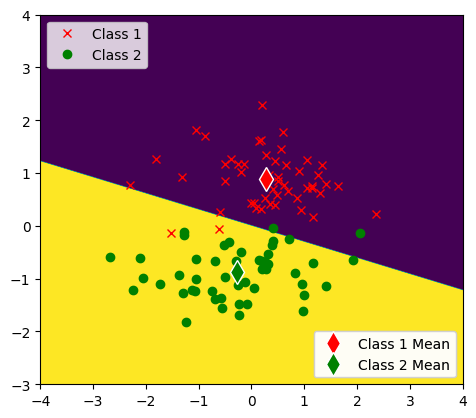

Classification Error: 4.0%




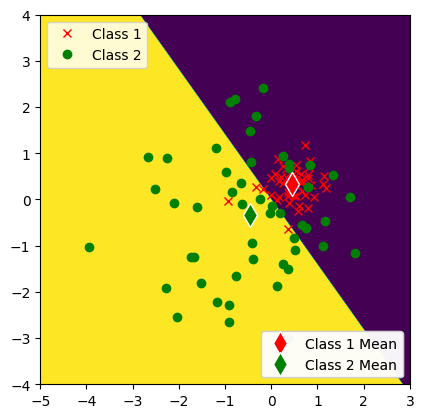

Classification Error: 22.0%




In [18]:
list_means = [] 
list_mean_std = []
training_mean_std = None

for dataset in training_datasets: 
  # get features and label
  features, labels = get_features(dataset) 
  # Normalizing data
  dataset = normalize(dataset) 
  features = normalize(features)
  list_mean_std.append(training_mean_std) 

  # Calculate the mean
  mean_arr = calc_mean(features, labels) 

  list_means.append(mean_arr) # Store in this list for training dataset Classification error calc.
  
  # Plot Decision Boundaries
  plotDecBoundaries(features,labels,mean_arr)
  percentage = classification_error(features,labels,mean_arr)
  print(f"Classification Error: {percentage}%\n\n")

In [19]:
for index in range(len(training_datasets)):
    features, labels = get_features(training_datasets[index])
     # Correctly handling the output of normalize
    normalized_features = normalize(features) 
    # Using normalized features
    percentage = classification_error(normalized_features, labels, list_means[index])  
    print(f"Training Dataset {index + 1} | Classification Error: {percentage}%")

Training Dataset 1 | Classification Error: 0.0%
Training Dataset 2 | Classification Error: 4.0%
Training Dataset 3 | Classification Error: 22.0%


CLASSIFICATION OF TESTING DATASET POINTS BASED ON CLASSIFICAION ERROR FUNCTION

In [20]:
features = []
labels = []
percentage = []
for index in range(len(testing_datasets)):
    f, l = get_features(testing_datasets[index])

    # Normalize the testing dataset features using the corresponding training dataset's parameters
    normalized_features = normalize(f)

    features.append(normalized_features)
    labels.append(l)
    
    #print testing datset classification errors by passing through loop
    percentage.append(classification_error(normalized_features, l, list_means[index]))
    print(f"Testing Dataset {index + 1} | Classification Error: {percentage[index]}%")


Testing Dataset 1 | Classification Error: 0.0%
Testing Dataset 2 | Classification Error: 4.0%
Testing Dataset 3 | Classification Error: 20.0%


PART D

Dataset 1 (Normalized vs. Unnormalized):

Normalized Data:
Training Error: 0.0%
Testing Error: 0.0%

Unnormalized Data:
Training Error: 0.0%
Testing Error: 0.0%

Observation: Whether or not the data is normalized has no effect on the error rates for Dataset 1. This could imply that Dataset 1's characteristics have already been scaled or that the class split is so clear-cut that normalization has no effect.

Dataset 2 (Normalized vs. Unnormalized):

Normalized Data:
Training Error: 4.0%
Testing Error: 4.0%

Unnormalized Data:
Training Error: 30.0%
Testing Error: 24.0%

Observation: Whether or not the data is normalized has no effect on the error rates for Dataset 1. This could imply that Dataset 1's characteristics have already been scaled or that the class split is so clear-cut that normalization has no effect.

Dataset 3 (Normalized vs. Unnormalized):

Normalized Data:
Training Error: 22.0%
Testing Error: 20.0%

Unnormalized Data:
Training Error: 23.0%
Testing Error: 21.0%

Observation: Normalized and unnormalized data have somewhat equal error rates, yet normalization results in significantly reduced error rates. This suggests that, compared to Dataset 2, normalization has a favorable but less pronounced effect. In addition to other problems that normalization cannot resolve on its own, the dataset may contain features that might benefit from scaling.Distribution amoung the class points is bit diverse compared to dataset 2.

PART E

For this part, use the following datasets:
dataset4_train.csv, dataset4_test.csv,
dataset5_train.csv, dataset5_test.csv,
dataset6_train.csv, dataset6_test.csv
 which have 3 classes (the first 2 classes of which are the same as in datasets1,2, 3).
Repeat parts (a)-(d) except using these 3-class datasets.

LOAD THE THREE CLASS TESTING MODEL USING PANDAS

In [21]:
# Loading test model
dataset4_test = pd.read_csv("ee559_dataset/dataset4_test.csv")
dataset5_test = pd.read_csv("ee559_dataset/dataset5_test.csv")
dataset6_test = pd.read_csv("ee559_dataset/dataset6_test.csv")

testing_datasets1 = [dataset4_test, dataset5_test, dataset6_test]

LOAD THE THREE CLASS TRAINING MODEL USING PANDAS

In [22]:
# Loading train model

dataset4_train = pd.read_csv("ee559_dataset/dataset4_train.csv")
dataset5_train = pd.read_csv("ee559_dataset/dataset5_train.csv")
dataset6_train = pd.read_csv("ee559_dataset/dataset6_train.csv")

training_datasets1 = [dataset4_train, dataset5_train, dataset6_train]

PRINTING MEAN FOR dataset4_train

In [23]:
a, b = get_features(dataset4_train)  
print(calc_mean(a, b))

[[ 1.18364448  0.79225357]
 [-1.09023208 -1.00148188]
 [-1.85341506  1.82366056]]


SAMPLE PLOT BOUNDRIES AND DECISION REGION FOR dataset4_train

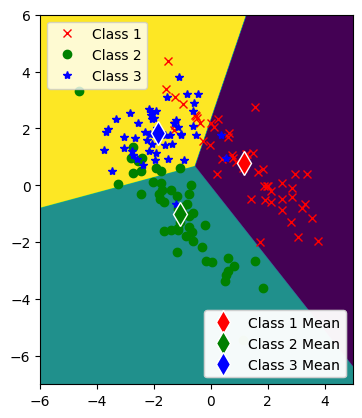

In [24]:
plotDecBoundaries(a,b, calc_mean(a, b))

In [25]:
dataset4_train

,X-axis,Y-axis,Class
0,-0.839139,3.202297,3.0
1,-1.147820,-0.842893,2.0
2,0.635721,1.823113,1.0
3,2.513194,-0.497300,1.0
4,1.859033,-0.032015,1.0
...,...,...,...
145,-1.932373,2.604821,3.0
146,1.142094,0.599150,1.0
147,2.106134,-0.583444,1.0
148,-0.847253,-0.665505,2.0


In [26]:
dataset4_train.columns

Index(['X-axis', 'Y-axis', 'Class'], dtype='object')

PLOT THE TRAINING DATASET BY USING PLOTDECBOUNDRIES.PY AND CLASSIFICATION OF POINTS BASED ON CLASSIFICAION ERROR FUNCTION

Decision Bopundry for Training Dataset


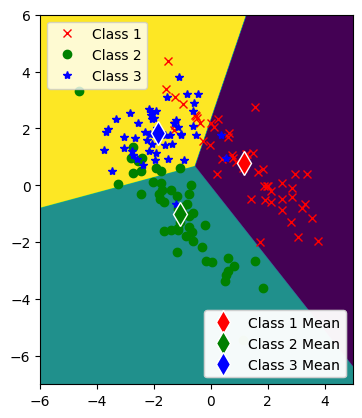

Classification Error: 16.666666666666664%


Decision Bopundry for Training Dataset


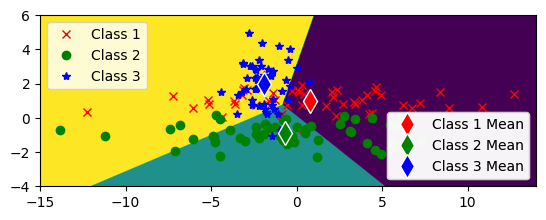

Classification Error: 35.333333333333336%


Decision Bopundry for Training Dataset


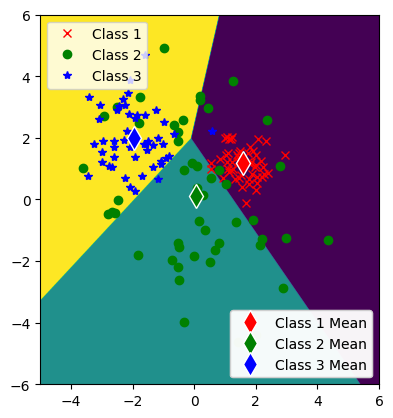

Classification Error: 19.333333333333332%




In [27]:
# Used to store the mean arrays of all traning datasets
list_means = [] 

for dataset in training_datasets1: 
  # get features and label 
  features, labels = get_features(dataset) 
  mean_arr = calc_mean(features, labels) 
  # Calculate the mean
  list_means.append(mean_arr) 

  # Plot Decision Boundaries
  print("Decision Bopundry for Training Dataset")
  plotDecBoundaries(features,labels,mean_arr)
  percentage = classification_error(features,labels,mean_arr)
  print(f"Classification Error: {percentage}%\n\n")

CLASSIFICATION OF TESTING DATASET POINTS BASED ON CLASSIFICAION ERROR FUNCTION

In [28]:
mean_arr

array([[ 1.58608409,  1.1710504 ],
       [ 0.04772534,  0.11132097],
       [-1.96284767,  1.98160218]])

In [29]:
# Initialize empty lists to store features, labels, and classification error percentages
features = []
labels = []
percentage = []
for index in range(len(testing_datasets1)):
    # Extract features and labels from the current testing dataset
    f, l = get_features(testing_datasets1[index])

    # Append the extracted features and labels to their respective lists
    features.append(f)
    labels.append(l)

    # Calculate the classification error for the current dataset by comparing the predicted labels based on the mean vectors
    percentage.append(classification_error(features[index], labels[index], list_means[index]))

    print(f"Testing Dataset {index + 1} | Classification Error: {percentage[index]}%")


Testing Dataset 1 | Classification Error: 13.333333333333334%
Testing Dataset 2 | Classification Error: 22.0%
Testing Dataset 3 | Classification Error: 24.0%


PLOT THE TESTING DATASET BY USING PLOTDECBOUNDRIES.PY AND CLASSIFICATION OF POINTS BASED ON CLASSIFICAION ERROR FUNCTION

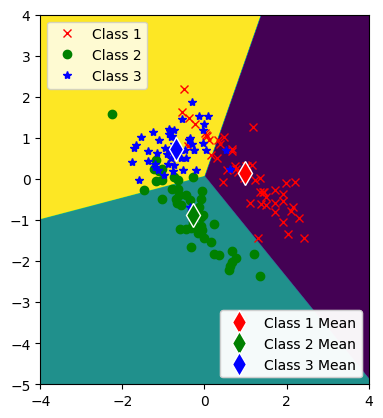

Classification Error: 16.666666666666664%




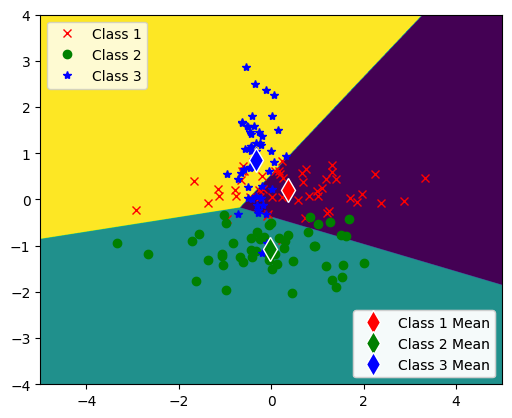

Classification Error: 24.0%




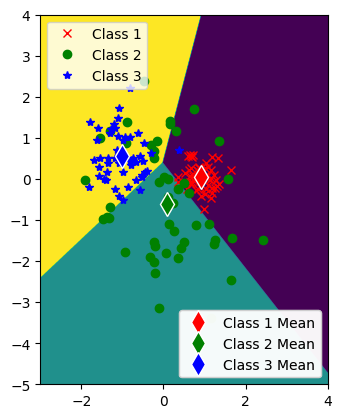

Classification Error: 15.333333333333332%




In [30]:
list_means = [] 
list_mean_std = []
training_mean_std = None

for dataset in training_datasets1: 
  # get features and label
  features, labels = get_features(dataset) 
  # Normalizing data
  dataset = normalize(dataset) 
  features = normalize(features)
  list_mean_std.append(training_mean_std) 

  # Calculate the mean
  mean_arr = calc_mean(features, labels) 

  list_means.append(mean_arr) # Store in this list for training dataset Classification error calc.
  
  # Plot Decision Boundaries
  plotDecBoundaries(features,labels,mean_arr)
  percentage = classification_error(features,labels,mean_arr)
  print(f"Classification Error: {percentage}%\n\n")

In [31]:
for index in range(len(training_datasets1)):
    features, labels = get_features(training_datasets1[index])

    # Normalize the training dataset features
    normalized_features = normalize(features)

    # Calculate the classification error using normalized features
    percentage = classification_error(normalized_features, labels, list_means[index])
    print(f"Training Dataset {index + 1} | Classification Error: {percentage}%")


Training Dataset 1 | Classification Error: 16.666666666666664%
Training Dataset 2 | Classification Error: 24.0%
Training Dataset 3 | Classification Error: 15.333333333333332%


CLASSIFICATION OF TESTING DATASET POINTS BASED ON CLASSIFICAION ERROR FUNCTION

In [32]:
features = []
labels = []
percentage = []
for index in range(len(testing_datasets1)):
    f, l = get_features(testing_datasets1[index])

    # Normalize the testing dataset features using the corresponding training dataset's parameters
    normalized_features = normalize(f)

    features.append(normalized_features)
    labels.append(l)
    
    percentage.append(classification_error(normalized_features, l, list_means[index]))
    print(f"Testing Dataset {index + 1} | Classification Error: {percentage[index]}%")


Testing Dataset 1 | Classification Error: 12.666666666666668%
Testing Dataset 2 | Classification Error: 10.666666666666668%
Testing Dataset 3 | Classification Error: 25.333333333333336%


3 Class Problem: Unnormalized data

Training Dataset 1 | Classification Error: 16.666666666666664%
Training Dataset 2 | Classification Error: 35.333333333333336%
Training Dataset 3 | Classification Error: 19.333333333333332%

Testing Dataset 1 | Classification Error: 13.333333333333334%
Testing Dataset 2 | Classification Error: 22.0%
Testing Dataset 3 | Classification Error: 24.0%

3 Class Problem:(Normalized Data)

Training Dataset 1 | Classification Error: 16.666666666666664%
Training Dataset 2 | Classification Error: 24.0%
Training Dataset 3 | Classification Error: 15.333333333333332%

Testing Dataset 1 | Classification Error: 12.666666666666668%
Testing Dataset 2 | Classification Error: 10.666666666666668%
Testing Dataset 3 | Classification Error: 25.333333333333336%


Many machine learning algorithms perform better overall after normalization, especially when features have varied scales or units. Your results for Training Dataset 2, where the error rate decreases from 35.33% (unnormalized) to 24.00% (normalized), clearly demonstrate this.
Normalization also increases performance (from 19.33% to 15.33%) for Training Dataset 3. On the other hand, the error rate stays the same for Training Dataset 1. This may suggest that Dataset 1's features are already at a scale where normalizing has little effect.
For Training Dataset 2, the reduction in error rate with normalization is notable. This suggests that the features in this dataset particularly benefit from scaling.
In Testing Datasets, the error rates are generally lower with normalized data, except for Dataset 3, where the error rate increases slightly after normalization. This could be due to various factors, including the nature of the data, the distribution of features, or overfitting during training.
The error rates suggest that the model performs reasonably well but still has room for improvement. Techniques such as feature selection, model parameter tuning, or trying different classification algorithms might lead to better results.
